In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_pickle('Group_1_data_cleaned.pkl')

In [39]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
1,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1
5,0,udp,private,SF,105,146,0.0,0.0,0.0,0.0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,1


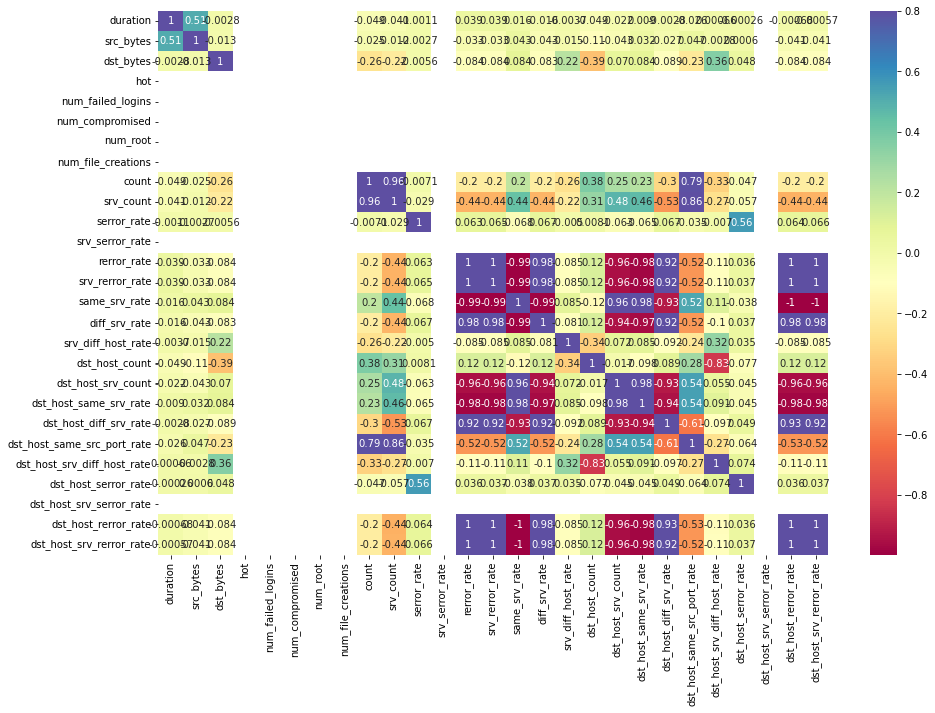

<Figure size 432x288 with 0 Axes>

In [40]:
#Heat map to find the correlation between the ibeacons.

correlation_matrix = df.corr()
fig = plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,
            vmax=0.8,
            annot=True, 
            cmap="Spectral")
plt.show()
plt.savefig('Heatmap.png', dpi=300)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274650 entries, 1 to 311028
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   duration                     274650 non-null  int64   
 1   protocol_type                274650 non-null  category
 2   service                      274650 non-null  category
 3   flag                         274650 non-null  category
 4   src_bytes                    274650 non-null  int64   
 5   dst_bytes                    274650 non-null  int64   
 6   land                         274650 non-null  category
 7   wrong_fragment               274650 non-null  category
 8   urgent                       274650 non-null  category
 9   hot                          274650 non-null  float64 
 10  num_failed_logins            274650 non-null  float64 
 11  logged_in                    274650 non-null  category
 12  num_compromised              274650 non-null

In [44]:
df = pd.get_dummies(df,columns=['protocol_type','service','flag','land','wrong_fragment','urgent','logged_in','root_shell',
                                'su_attempted','num_shells','num_access_files','num_outbound_cmds','is_host_login',
                                'is_guest_login'])

In [45]:
df.head()

,duration,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,count,srv_count,...,num_access_files_0.0,num_access_files_1.0,num_access_files_2.0,num_access_files_3.0,num_access_files_4.0,num_outbound_cmds_0.0,is_host_login_0.0,is_host_login_1.0,is_guest_login_0.0,is_guest_login_1.0
1,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
2,0,105,146,0.0,0.0,0.0,0.0,0.0,1,1.0,...,1,0,0,0,0,1,1,0,1,0
3,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
4,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0
5,0,105,146,0.0,0.0,0.0,0.0,0.0,2,2.0,...,1,0,0,0,0,1,1,0,1,0


In [46]:
X = df.iloc[0:].drop('label',axis=1)
y = df[['label']]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [48]:
from sklearn.linear_model import RidgeClassifier

lr = RidgeClassifier()

In [49]:
lr.fit(X_train, y_train)

RidgeClassifier()

In [50]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

accuracy_score(y_test, y_pred)

0.9605318730611829

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     12941
           1       1.00      0.96      0.98     55722

    accuracy                           0.96     68663
   macro avg       0.92      0.97      0.94     68663
weighted avg       0.97      0.96      0.96     68663



In [53]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

k_fold = RepeatedStratifiedKFold(n_splits=2, 
                                 n_repeats=2, 
                                 random_state=42)

para_lr = {'max_iter': [1, 5, 10, 50], 
            'alpha': [0.1, 0.5, 1],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

gslrc = GridSearchCV(estimator=lr, 
                        param_grid=para_lr, 
                        cv=k_fold,
                        verbose=1, 
                        scoring='accuracy',
                        return_train_score=True)


gslrc.fit(X_train, y_train)



Fitting 4 folds for each of 96 candidates, totalling 384 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=2, random_state=42),
             estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.5, 1], 'max_iter': [1, 5, 10, 50],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             return_train_score=True, scoring='accuracy', verbose=1)

In [54]:
gslrc.best_params_

{'alpha': 0.1, 'max_iter': 1, 'solver': 'auto'}

In [55]:
gslrc_best = RidgeClassifier(max_iter = 1, 
                           alpha = 0.1,
                           solver = 'auto')

In [56]:
gslrc_best.fit(X_train,y_train)

RidgeClassifier(alpha=0.1, max_iter=1)

In [57]:
gslrc_pred = gslrc_best.predict(X_test)

In [58]:
print(classification_report(y_test, gslrc_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     12941
           1       1.00      0.96      0.98     55722

    accuracy                           0.96     68663
   macro avg       0.92      0.97      0.94     68663
weighted avg       0.97      0.96      0.96     68663



In [59]:
accuracy_score(y_test, gslrc_pred)

0.9605755647146207